In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Step 2: Load the Cleaned Dataset
data_path = "../data/worldbank_gdp_cleaned.csv"

if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset not found at {data_path}. Please run the EDA notebook first.")

# Load the dataset
df = pd.read_csv(data_path)


In [3]:
# Step 3: Function to Train and Forecast using ARIMA

def train_arima(country_name, forecast_years=5, split_year=2015):
    """
    Train an ARIMA model for a given country and forecast future GDP growth rate.
    
    Args:
    country_name (str): Name of the country.
    forecast_years (int): Number of years to forecast.
    
    Returns:
    - forecasted_values (pd.Series)
    - full_series (pd.Series)
    """
    # Filter data for the country
    country_df = df[df['country'] == country_name].sort_values('Year')
    
    if country_df.empty:
        raise ValueError(f"No data found for country: {country_name}")

    train_df = country_df[country_df['Year'] <= split_year]
    test_df = country_df[country_df['Year'] > split_year]

    # Select the target variable
    y_train = train_df['GDP Growth Rate (%)']
    y_test = test_df['GDP Growth Rate (%)']

    # Fit ARIMA Model (simple order for start)
    model = ARIMA(y_train, order=(1,1,1))
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(y_test))

    # Create full series for plotting
    full_series = pd.concat([y_train, forecast], axis=0)
    historical_years = list(train_df['Year'])
    future_years = list(test_df['Year'])
    full_years = historical_years + future_years
    full_series.index = full_years

    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, forecast))
    mae = mean_absolute_error(y_test, forecast)
    
    return forecast, full_series, full_years, rmse, mae

/Users/deepakdeokar/Desktop/GDP_Forecasting_Project/venv4/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/deepakdeokar/Desktop/GDP_Forecasting_Project/venv4/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/deepakdeokar/Desktop/GDP_Forecasting_Project/venv4/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/deepakdeo

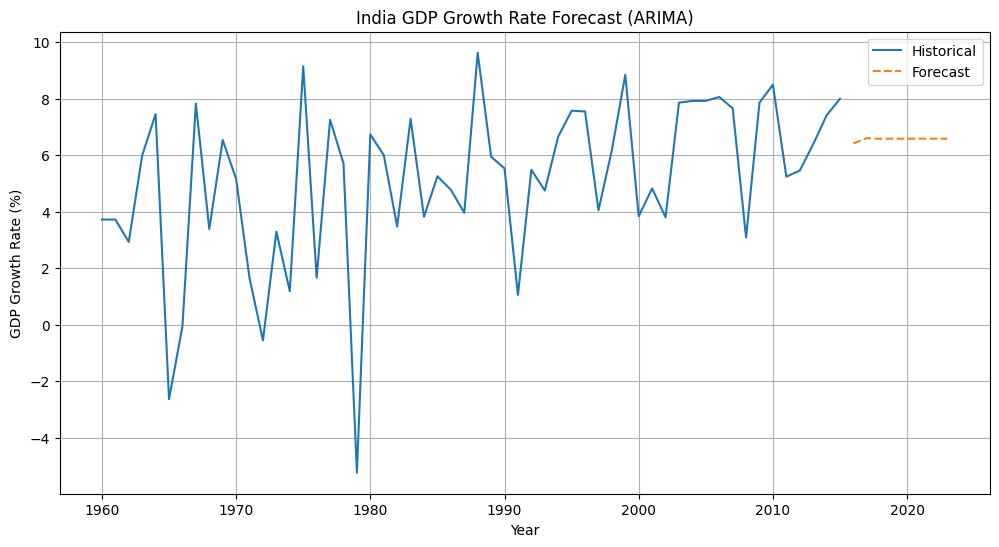


Evaluation for India:
RMSE: 4.69
MAE: 2.79


In [4]:
# Step 4: Forecast and Evaluate Example Country
example_country = "India"
forecast, full_series, full_years, rmse, mae = train_arima(example_country, forecast_years=8, split_year=2015)

# Step 5: Plot the Result
plt.figure(figsize=(12,6))
plt.plot(full_years[:-len(forecast)], full_series.iloc[:-len(forecast)], label="Historical")
plt.plot(full_years[-len(forecast):], full_series.iloc[-len(forecast):], label="Forecast", linestyle='--')
plt.title(f"{example_country} GDP Growth Rate Forecast (ARIMA)")
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Print Evaluation Metrics
print(f"\nEvaluation for {example_country}:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

In [6]:
# Save evaluation metrics to file
import csv

results_path = "../data/model_results.csv"

# If file doesn't exist, create it and write header
if not os.path.exists(results_path):
    with open(results_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Model", "Country", "RMSE", "MAE"])  # header

# Append results
with open(results_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ARIMA", example_country, rmse, mae])  # Example for ARIMA